<a href="https://colab.research.google.com/github/wavallejol/ColabChem/blob/main/Session4_English.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Session 4. Equation of the State (EoS)**
# **Objectives**
 
 
1.   To study the thermodynamic behavior of gases using Google Colabs
2.   To utilize the command `for` to create routines.
---

# **Introduction**

<div align="justify">The thermodynamic state of a gas can be studied using the state functions ($ \small P, V, T $) integrating into a mathematical equation. This equation is known as <a href="https://en.wikipedia.org/wiki/Equation_of_state#:~:text=In%20physics%20and%20thermodynamics%2C%20an,PVT)%2C%20or%20internal%20energy.">equation of state</a> (EoS). There are different types of EoS: (i) ideal gas equation, (ii) viral equation, (iii) analytics, and (iv) non-analytic equations of state. We review the analytical EoS. These equations have an important characteristic;  the function  $ \small f(V, T $) has powers of V no higher than quartic. There is a single general equation for representing all cubic EoS (Abbott, 1979. Fuente:<a href="https://books.google.com.co/books/about/The_Properties_of_Gases_and_Liquids_5E.html?id=9tGclC3ZRX0C&redir_esc=y"> B. Poling et.al., The properties of Gases and Liquids</a>):

$\small P=\frac{RT}{\bar{V}-b}-\frac{\Theta(\bar{V}-\eta)}{(\bar{V}-b)(V^{2}+\delta \bar{V}+\varepsilon )} \kern 2pc (1)$ 

Depending on the model, the parameters $\small \Theta, b, \eta, \delta, \varepsilon$ can be constant or they can vary with T and composition. The simplest EoS is the ideal gas equation; in this case, all the parameters are equals to zero (see some examples following this link <a href="https://github.com/wavallejol/ColabChem/blob/main/Session3_English.ipynb"> session 3</a>). Table 1 lists the values ​​of the parameters for two EoS: (i) Vander Waals and (ii) Redlich-Kwong equations.</div>

<div align = "center">Tabla 1. Parameters of equation 1 for EoS of Vander Waals and Redlich-Kwong. (Source:<a href="https://books.google.com.co/books/about/The_Properties_of_Gases_and_Liquids_5E.html?id=9tGclC3ZRX0C&redir_esc=y"> B. Poling et.al., The properties of Gases and Liquids</a>).</div>
 
EoS|$\small \delta$ | $\small \varepsilon$| $\small \Theta$| $\small \eta$
-------------------|------------------|------------------|------------------|------------------
Van der Waals | $\small 0$ | $\small 0$ | $\small a$ |$\small b$  
Redlich Kwong | $\small b$ | $\small 0$ | $\small a/T^{0.5}$|$\small b$ 
 
Now, we will study these two cubic EoS.

#***Activity 1: The Van der Waals equation***

In the <a href="https://en.wikipedia.org/wiki/Van_der_Waals_equation"> Van der Waals equation</a> the parameters of Equation  1, take the values ​​listed in table 1:

$\small P=\frac{RT}{(\bar{V}-b)}-\frac{a}{\bar{V}^2} \kern 2pc (2)$ 

Where $ \small a, b $ are gas-specific constants and R is the gas constant. The values ​​of these constants are calculating in the thermodynamic state of the critical point accordint to:

$\small a=(\frac{27}{64})\frac{T_{c}^{2}R^{2}}{P_{c}} \kern 2pc (3)$ 
 
$\small b=(\frac{1}{8})\frac{RT_{c}}{P_{c}} \kern 2pc (4)$  
 
Where $\small (T_{c})$ y $\small (P_{c})$ are the temperature and critical pressure respectively. 

We will now compare the diagram $\small (P \bar{V})$ for one mole of methane using the Vander Waals equation at the following temperature values ($\small 0.1T_{c},0.25T_{c},0.5T_{c},0.75T_{c},1.0T_{c},2.0T_{c})$.

To solve this exercise: (i) We will import the libraries.  (ii) We will define the variables. (iii) We will define the function to describe the Van der Waals equation.

To define the equation we will utilize the command `def`, after this command, we will place the name of our function (it will be "Pvw") following by the arguments of the function ($\small T$ y $\small \bar V$), this first line of the routine complete with a colon. Then we place the mathematical function. Finally, in the last line of the function, we write the command `return` sfollowed by the name of the defined function ("Pvw"). You can review a tutorial on functions at the following link: <a href="https://nbviewer.jupyter.org/github/mbakker7/exploratory_computing_with_python/blob/master/notebook4_functions/py_exploratory_comp_4.ipynb#ex1answer"> Functions</a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
R, Tc, Pc= 8.314, 190.4, 4.6e6
a,b =(27/64)*Tc**2*R**2/Pc, (Tc*R)/(Pc*8) #Equation parameters
def Pvw(T,Vm):                            #Ec. Van der Waals
    Pvw=R*T/(Vm-b)- a/(Vm**2)
    return Pvw

Code source:<a href="https://nbviewer.jupyter.org/github/iurisegtovich/PyTherm-applied-thermodynamics/blob/master/contents/main-lectures/2-numpy-matplotlib-vdW-EoS-isotherms.ipynb">  PyTherm-applied-thermodynamics</a>

Now, we will utilize the `for` loop to obtain the $\small (P  \bar{V})$ diagram in the temperatures required.

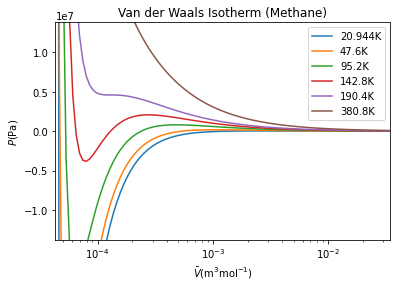

In [2]:
fig = plt.figure(1)
for T in np.array([0.11,0.25,0.5,0.75,1,2])*Tc:                 # we create an array for Temperatures
    Vm=np.logspace(np.log10(b*1.01),2+np.log10(R*Tc/Pc),100)    # we use a logarithmic scale
    plt.semilogx(Vm,Pvw(T,Vm), label=str(T)+"K")                
    plt.title("Van der Waals Isotherm (Methane)")            
    plt.ylabel(r"$ {P (\mathrm{Pa})} $")                    
    plt.xlabel(r"$ \bar{V}(\mathrm{m^{3}mol^{-1}}) $")         
    plt.ylim(-3*Pc,Pc*3)                                        
    plt.xlim(b,(100*R*Tc/Pc))                                   
plt.legend()
plt.show()

Now let's get the plot using the ideal gas equation.

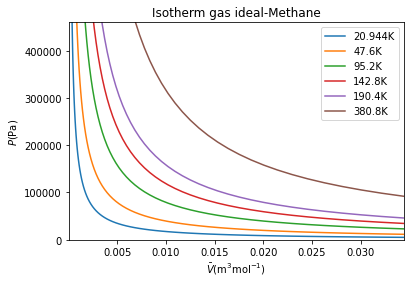

In [3]:
import numpy as np
import matplotlib.pyplot as plt
 
def P(T,Vm):               # ideal gas equation
    P=8.314*T/Vm
    return P
fig = plt.figure(1)

for T in np.array([0.11,0.25,0.5,0.75,1,2])*Tc: 
    Vm=np.logspace(np.log10(b*1.01),2+np.log10(R*Tc/Pc),100)           
    plt.plot(Vm, P(T,Vm), label=str(T)+"K")              
    plt.title("Isotherm gas ideal-Methane")            
    plt.ylabel(r"$ {P (\mathrm{Pa})} $")                    
    plt.xlabel(r"$ \bar{V}(\mathrm{m^{3}mol^{-1}}) $")
    plt.ylim(0,Pc/10)                                        
    plt.xlim(b,(100*R*Tc/Pc))                                          
plt.legend()
plt.show()

*Exercise 1:* Modify the routine of the previous code cell and plotting the diagram $\small P vs \bar{V}$ to one mol of $\small CCl_{4(g)}$.


#***Activity 2: The Redlich Kwong equation***

In the <a href="https://en.wikipedia.org/wiki/Redlich%E2%80%93Kwong_equation_of_state#:~:text=In%20physics%20and%20thermodynamics%2C%20the,temperatures%20above%20the%20critical%20temperature."> Redlich Kwong equation</a> the parameters of Equation  1, take the values ​​listed in table 1:

$\small P=\frac{RT}{(\bar{V}-b)}-\frac{a}{T^{0.5}(\bar{V}^2+b\bar{V})} \kern 2pc (5)$ 

Where parameters $\small a, b$ are gas-specific constants and R is the gas constant. The values ​​of these constants are calculating in the thermodynamic state of the critical point accordint to:

$\small a=0.42748\frac{T_{c}^{2.5}R^{2}}{P_{c}} \kern 2pc (6)$ 
 
$\small b=0.08664\frac{RT_{c}}{P_{c}} \kern 2pc (7)$ 
 
Where $\small (T_{c})$ and $\small (P_{c})$ are the temperature and critical pressure respectively. 

*Exercise 2:* You must plotting the  $\small (P  \bar{V})$ diagram  for one mole of methane using the Redlich-Kwong equation at the following temperature values   ($\small 0.1T_{c},0.25T_{c},0.5T_{c},0.75T_{c},1.0T_{c},2.0T_{c})$.

---
#***Activiy 3: Solution of activities***

We present the solutions for the activities you developed in the previous sections.

*Solution exercise 1:* Using the values ​​of the critical temperature and pressure reported for the $ \small CCl_{4(g)} $ and the routine explained in activity 1, we obtain:

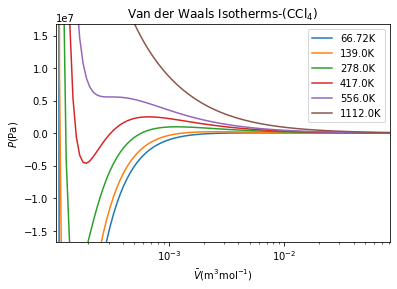

In [5]:
import numpy as np
import matplotlib.pyplot as plt
R, Tc, Pc= 8.314, 556, 5.57e6
a, b= (27/64)*Tc**2*R**2/Pc, (Tc*R)/(Pc*8) 

def Pvw(T,Vm):                    
    Pvw=R*T/(Vm-b)- a/(Vm**2)
    return Pvw

fig = plt.figure(1)
for T in np.array([0.12,0.25,0.5,0.75,1,2])*Tc:                 
    Vm=np.logspace(np.log10(b*1.01),2+np.log10(R*Tc/Pc),100)    
    plt.semilogx(Vm,Pvw(T,Vm), label=str(T)+"K")               
    plt.title("Van der Waals Isotherms-" r"$ (\mathrm{CCl_{4}}) $")            
    plt.ylabel(r"$ {P (\mathrm{Pa})} $")                    
    plt.xlabel(r"$ \bar{V}(\mathrm{m^{3}mol^{-1}}) $")         
    plt.ylim(-3*Pc,Pc*3)                                        
    plt.xlim(b,(100*R*Tc/Pc))                                   
plt.legend()
plt.show()


*Solution exercise 2:* Using the values ​​of the critical temperature and pressure reported for methane and the routine presented in Activity 2.

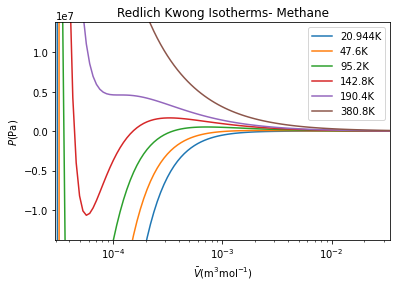

In [6]:
import numpy as np
import matplotlib.pyplot as plt

R, Tc, Pc= 8.314, 190.4, 4.6e6
a, b = 0.42748*Tc**2.5*R**2/Pc, 0.08664*(Tc*R)/(Pc) 

def Prk(T,Vm):                                                  
    Prk=R*T/(Vm-b)- a/(T**0.5*(Vm**2+b*Vm))
    return Prk

fig = plt.figure(1)
for T in np.array([0.11,0.25,0.5,0.75,1,2])*Tc:                 
    Vm=np.logspace(np.log10(b*1.01),2+np.log10(R*Tc/Pc),100)   
    plt.semilogx(Vm,Prk(T,Vm), label=str(T)+"K")               
    plt.title("Redlich Kwong Isotherms- Methane")            
    plt.ylabel(r"$ {P (\mathrm{Pa})} $")                    
    plt.xlabel(r"$ \bar{V}(\mathrm{m^{3}mol^{-1}}) $")         
    plt.ylim(-3*Pc,Pc*3)                                        
    plt.xlim(b,(100*R*Tc/Pc))                                   
plt.legend()
plt.show()

---
#***Recommended Links***
 
*  Functions Tutorial:<a href="https://nbviewer.jupyter.org/github/mbakker7/exploratory_computing_with_python/blob/master/notebook4_functions/py_exploratory_comp_4.ipynb#ex1answer"> Functions</a>
*  Manual `for` statements: <a href="https://docs.python.org/3/tutorial/controlflow.html">for statements</a>
*  NumPy Manual : <a href="https://numpy.org/doc/stable/index.html">NumPy v1.21</a>
* `numpy` Tutorial : <a href="https://cs231n.github.io/python-numpy-tutorial/">numpy</a>
*  `math` Tutorial: <a href="https://realpython.com/python-math-module/">math</a>
*  Mathematics in phyton tutorial : (i) <a href="https://github.com/drvinceknight/Python-Mathematics-Handbook">Mathematics in phyton</a> (ii) <a href="https://personal.math.ubc.ca/~pwalls/math-python/jupyter/notebook/">Mathematical Phyton</a>



---
#***References***
*  NumPy, matplotlib and the Van der Waals Equation of State isotherms. <a href="https://nbviewer.jupyter.org/github/iurisegtovich/PyTherm-applied-thermodynamics/blob/master/contents/main-lectures/2-numpy-matplotlib-vdW-EoS-isotherms.ipynb">  PyTherm-applied-thermodynamics</a>.

*  B. E. Poling, J. M. Prausnitz, J.P. O'Connell. (2001). The properties of Gases and Liquids. Ed. 5th. McGraw-Hill. pp. 128.

